In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
from sklearn.linear_model import LinearRegression

%matplotlib inline

warnings.filterwarnings('ignore')

In [2]:
data_GOOG_fixed = pd.read_excel("Data_GOOG.xlsx")
data_IBM_fixed = pd.read_excel("Data_IBM.xlsx")
data_AAPL_fixed = pd.read_excel("Data_AAPL.xlsx")

In [40]:
class TrendAnalyzer():
    def __init__(self, data: pd.DataFrame, column_of_interest: str):
        self.regression = LinearRegression()
        self.column = column_of_interest
        self.data = data
        
        x = self.data.index.to_numpy().reshape(-1,1)
        y = self.data[self.column].to_numpy().reshape(-1,1)
        self.init_regression(x, y)
        
    def init_regression(self, x, y):
        self.regression.fit(x, y)
        self.preds = self.regression.predict(x)
        
    def draw_plot_with_trend(self):
        plt.plot(self.data.index, self.data[self.column], self.data.index, self.preds.flatten())
    
    def draw_plot_without_trend(self):
        err = self.data[self.column].to_numpy().reshape(-1,1) - self.preds
        plt.figure(figsize = (12,7))
        plt.plot(self.data.index, err.flatten(), self.data.index, np.zeros((len(self.data.index))))
        
    def draw_plots(self):
        fig, axes = plt.subplots(1, 2, figsize=(22, 7))
        err = self.data[self.column].to_numpy().reshape(-1,1) - self.preds
        axes[0].plot(self.data.index, self.data[self.column], self.data.index, self.preds.flatten())
        axes[1].plot(self.data.index, err.flatten(), self.data.index, np.zeros((len(self.data.index))))
        axes[0].set_title("Data with trend line")
        axes[1].set_title("Data after removing trend")
        
        
class LogarifmicTrendAnalyzer(TrendAnalyzer):
    def __init__(self, data: pd.DataFrame, column_of_interest: str):
        super(LogarifmicTrendAnalyzer, self).__init__(data, column_of_interest)
        
    def init_regression(self, x, y):
        self.regression.fit(x, np.log(y))
        self.preds = np.exp(self.regression.predict(x))
        
class SquareTrendAnalyzer(TrendAnalyzer):
    def __init__(self, data: pd.DataFrame, column_of_interest: str):
        super(SquareTrendAnalyzer, self).__init__(data, column_of_interest)
        
    def init_regression(self, x, y):
        x = np.concatenate((x, np.power(x, 2)), axis=1)
        self.regression.fit(x, y)
        self.preds = self.regression.predict(x)

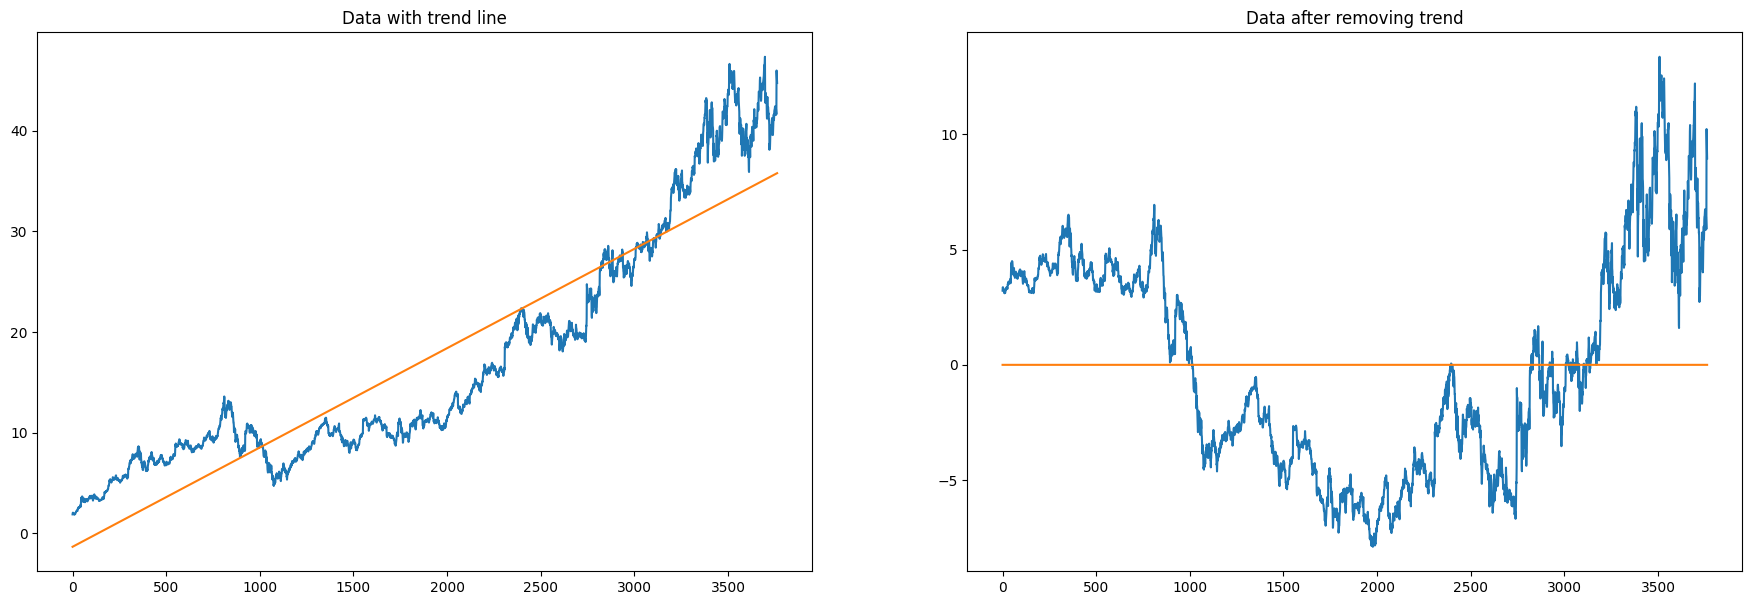

In [50]:
analyzer_GOOG_sq = TrendAnalyzer(data_GOOG_fixed, 'Adj Close')
analyzer_GOOG_sq.draw_plots()

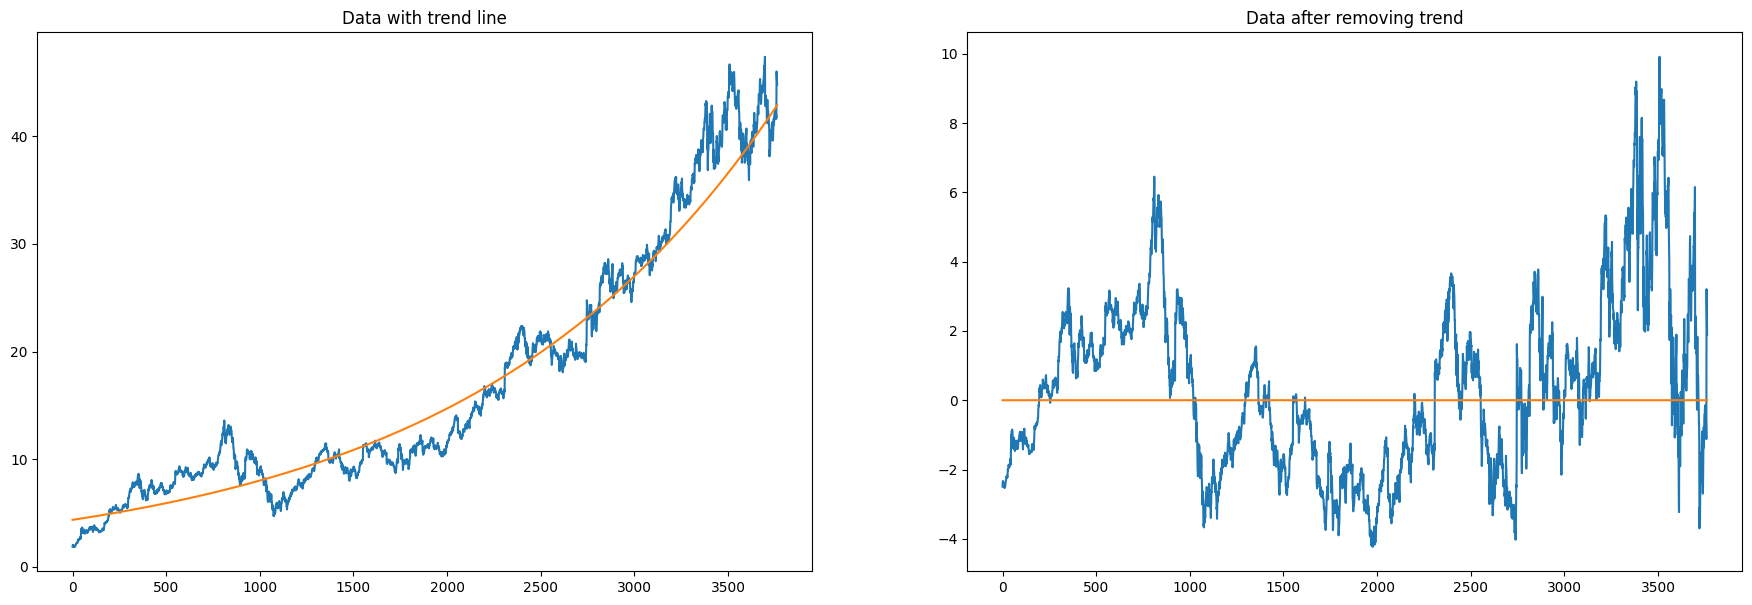

In [51]:
analyzer_GOOG_log = LogarifmicTrendAnalyzer(data_GOOG_fixed, 'Adj Close')
analyzer_GOOG_log.draw_plots()

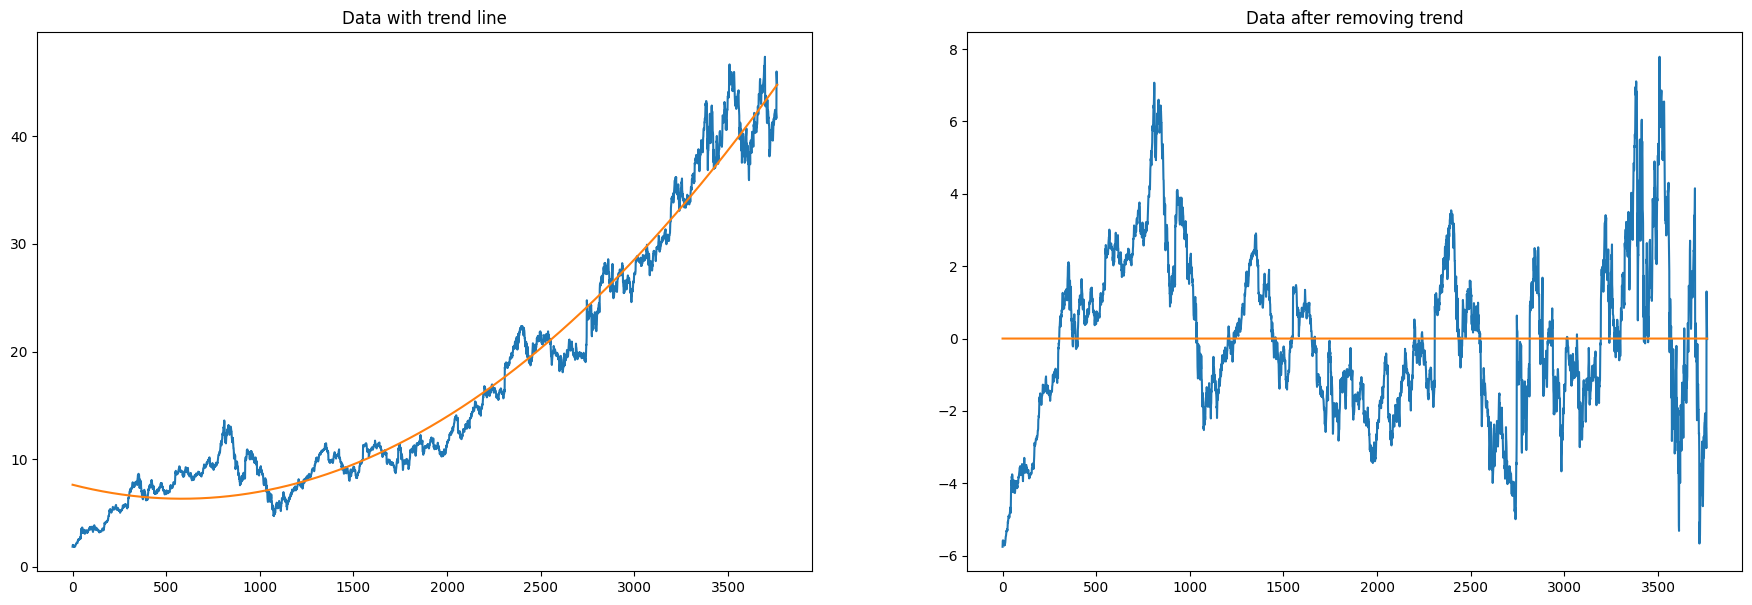

In [52]:
analyzer_GOOG = SquareTrendAnalyzer(data_GOOG_fixed, 'Adj Close')
analyzer_GOOG.draw_plots()

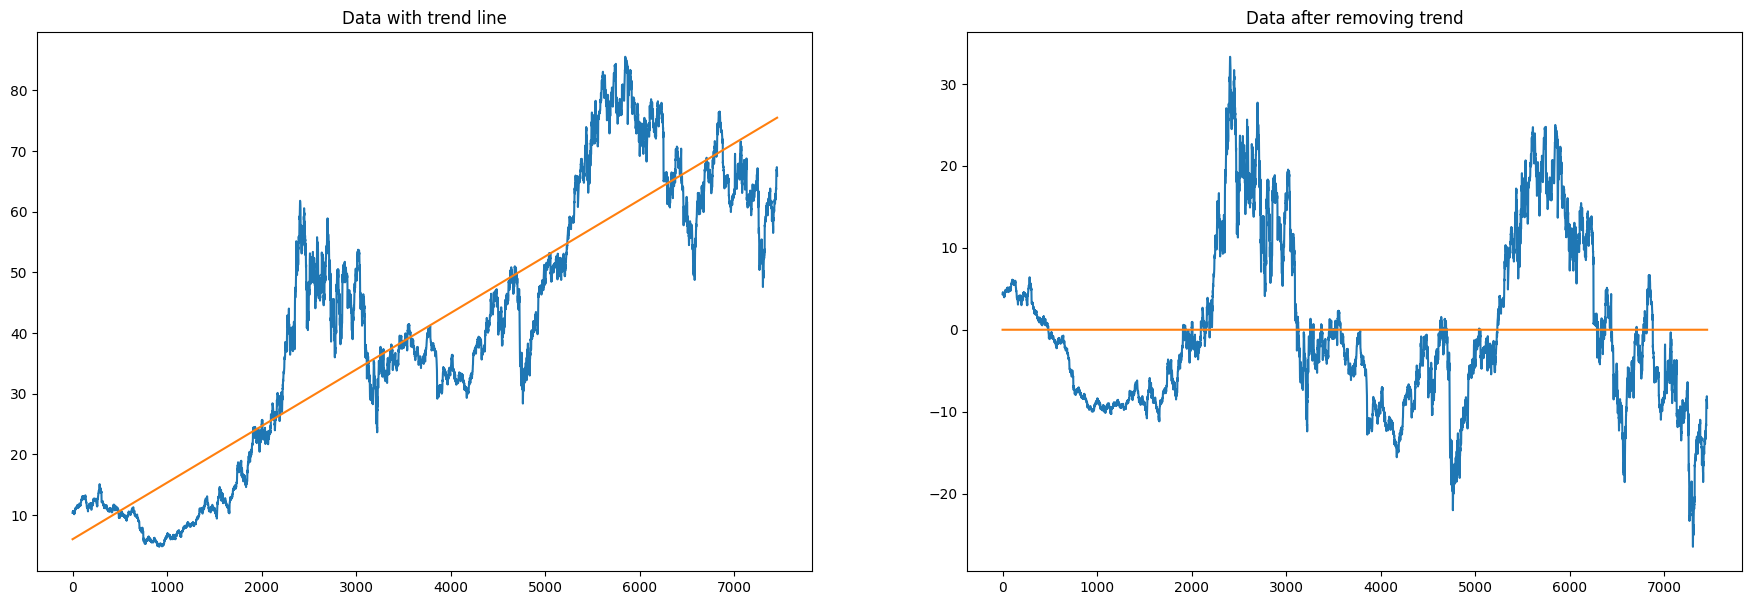

In [44]:
analyzer_IBM = TrendAnalyzer(data_IBM_fixed, 'Adj Close')
analyzer_IBM.draw_plots()

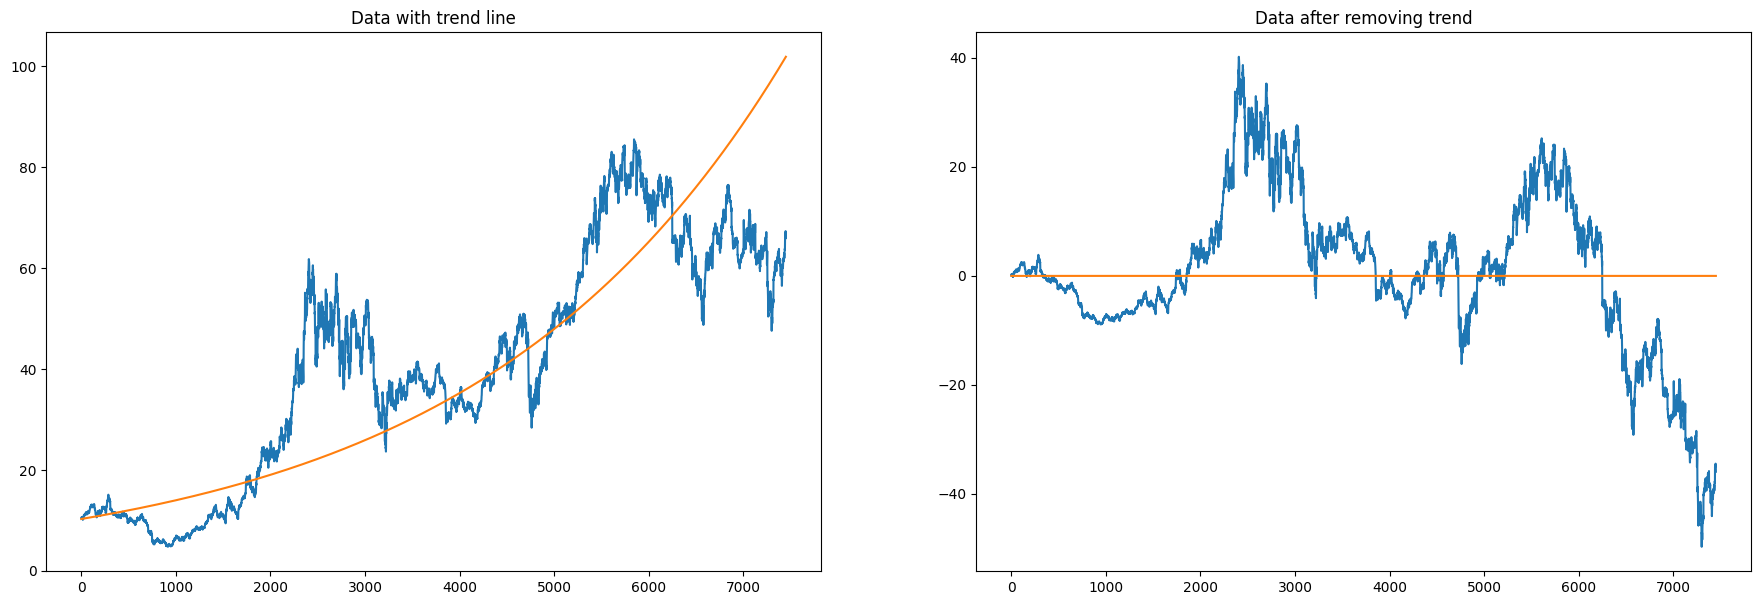

In [45]:
analyzer_IBM_log = LogarifmicTrendAnalyzer(data_IBM_fixed, 'Adj Close')
analyzer_IBM_log.draw_plots()

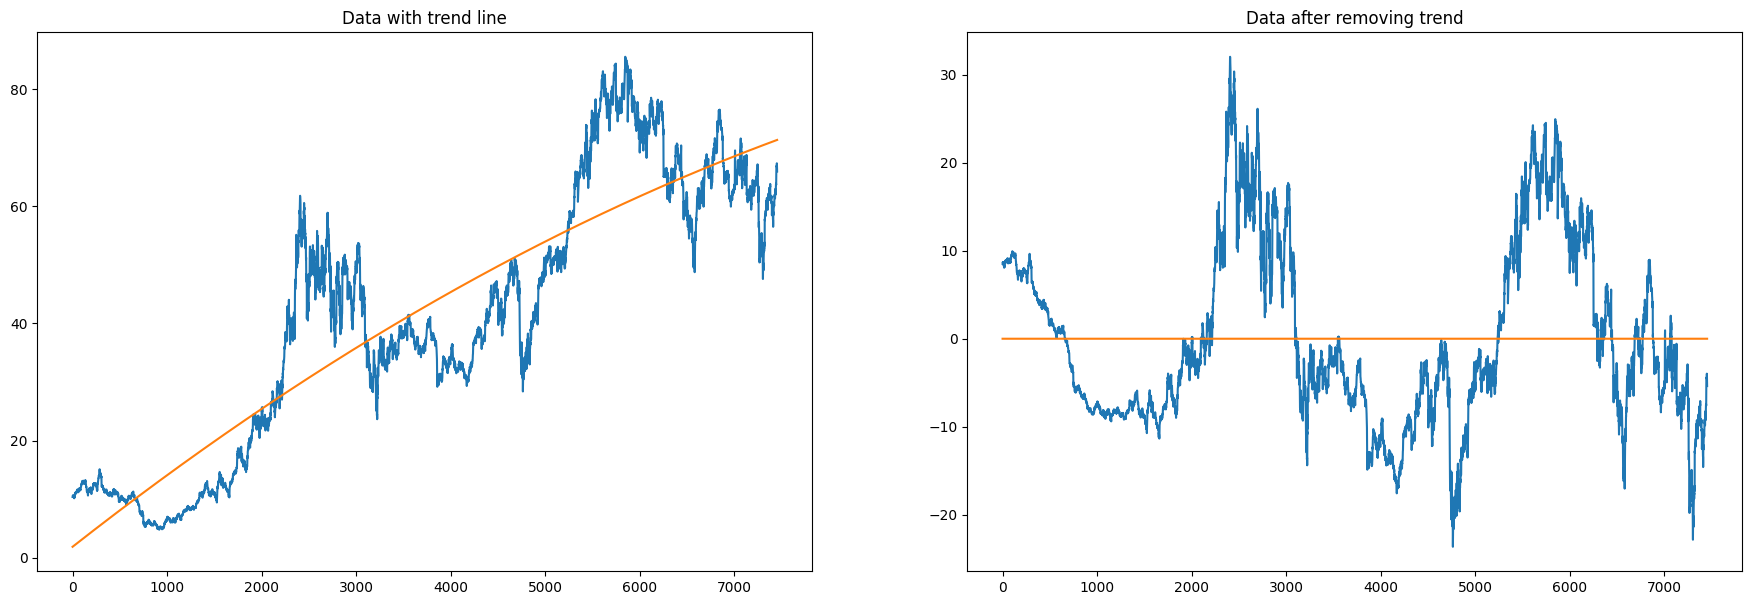

In [46]:
analyzer_IBM = SquareTrendAnalyzer(data_IBM_fixed, 'Adj Close')
analyzer_IBM.draw_plots()

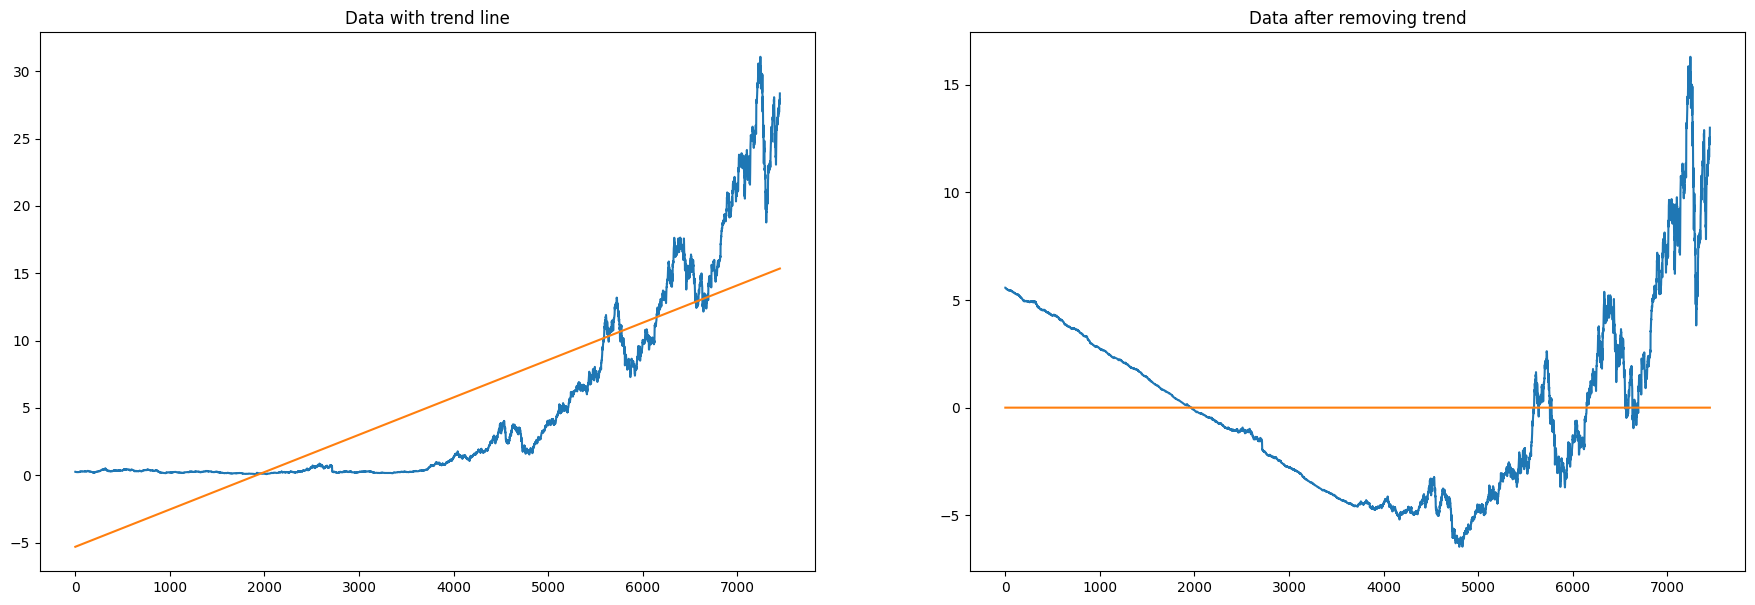

In [47]:
analyzer_AAPL = TrendAnalyzer(data_AAPL_fixed, 'Adj Close')
analyzer_AAPL.draw_plots()

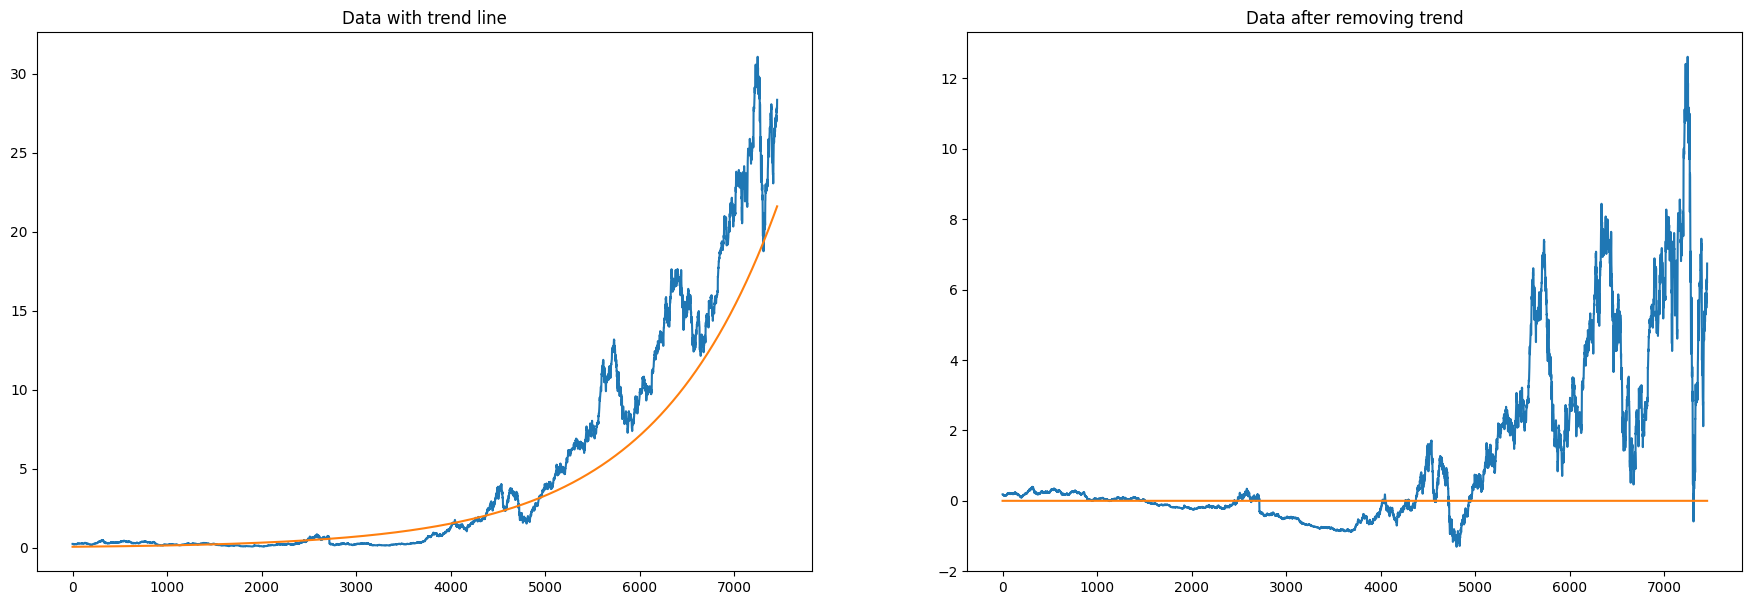

In [48]:
analyzer_AAPL_log = LogarifmicTrendAnalyzer(data_AAPL_fixed, 'Adj Close')
analyzer_AAPL_log.draw_plots()

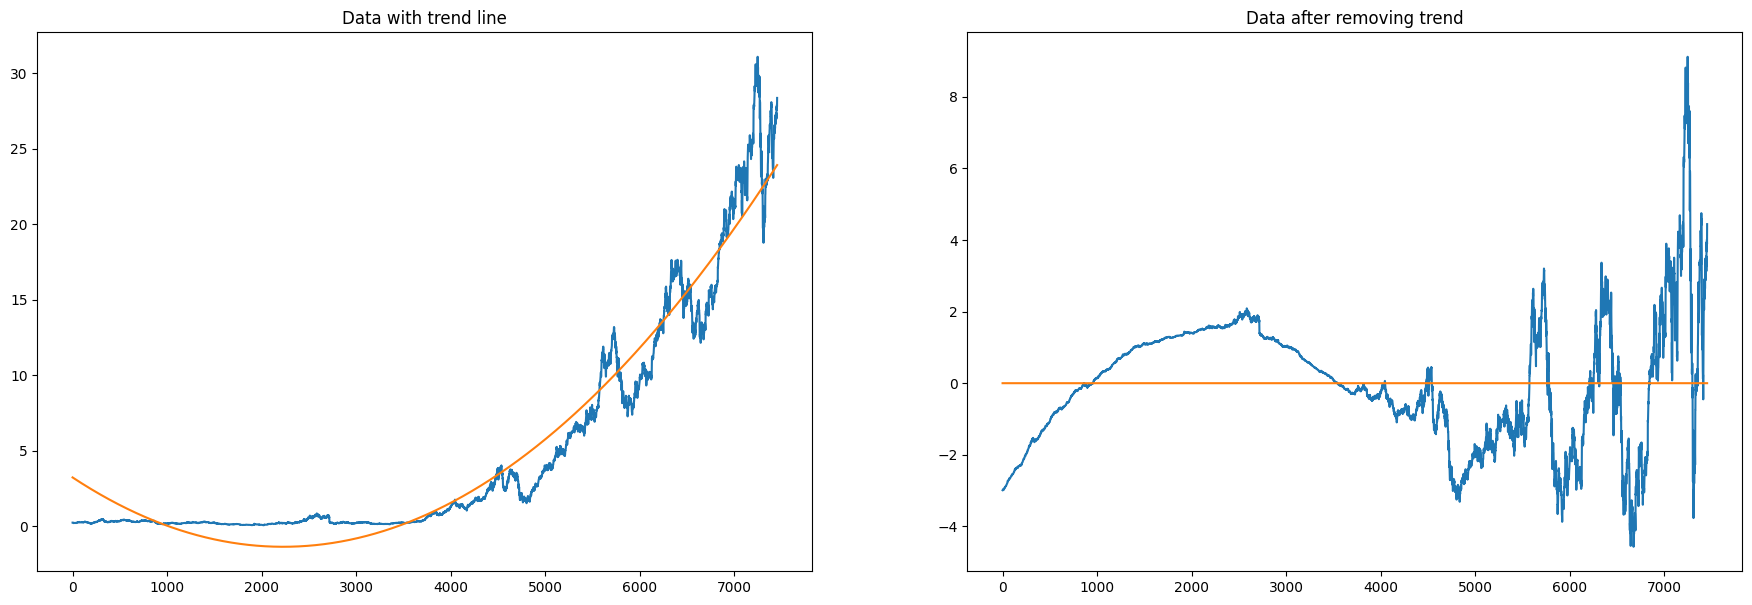

In [49]:
analyzer_AAPL_sq = SquareTrendAnalyzer(data_AAPL_fixed, 'Adj Close')
analyzer_AAPL_sq.draw_plots()